<a href="https://colab.research.google.com/github/Aditya-Singh-CSE/Task1-Sparks-Projects/blob/main/Task1_Sparks_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP - THE SPARKS FOUNDATION**
# Data Science and Business Analytics Task 1 - Prediction using Supervised ML
Author : Aditya Singh

# **Importing the required libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

# **Load the Data**

In [3]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Explore the Data**

In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.isnull().sum() # Checking the missing values

Hours     0
Scores    0
dtype: int64

# **Visualizing the Data**

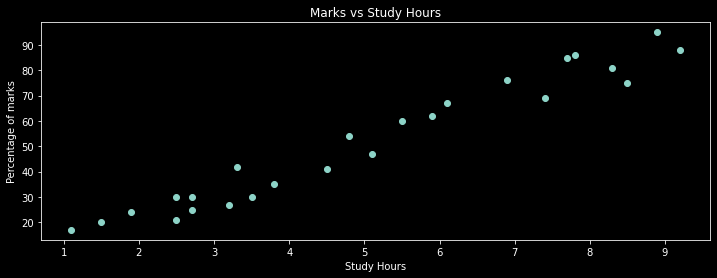

In [7]:
# Create a scatter plot for the Study Hours and Percentage of Marks
plt.style.use('dark_background')
plt.figure(figsize=(12,4))
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Study Hours')
plt.ylabel('Percentage of marks')
plt.title('Marks vs Study Hours')
plt.show()

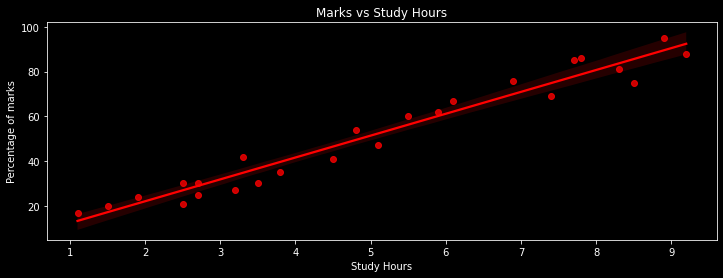

In [8]:
#Create a regression plot for the Study Hours and Percentage of Marks
plt.style.use('dark_background')
plt.figure(figsize=(12,4))
sns.regplot(x='Hours',y='Scores',data=df,color='r')
plt.xlabel('Study Hours')
plt.ylabel('Percentage of marks')
plt.title('Marks vs Study Hours')
plt.show()

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# **Preparing the Data**

In [10]:
#Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)  #Splitting the data

In [11]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((20, 1), (5, 1), (20,), (5,))

# **Training the model**

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
print("\n Model Training Completed")


 Model Training Completed


# **Predicting the Marks**

In [13]:
y_predict = lin_reg.predict(X_test)

In [14]:
df1 = pd.DataFrame({'Actual_Marks': Y_test, 'Predicted_Marks' : y_predict})
df1['Study_Hours'] =X_test
df1

,Actual_Marks,Predicted_Marks,Study_Hours
0,20,16.884145,1.5
1,27,33.732261,3.2
2,69,75.357018,7.4
3,30,26.794801,2.5
4,62,60.491033,5.9


**Predicted Marks vs Actual Marks**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


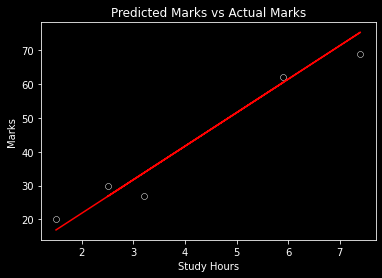

In [15]:
sns.scatterplot(df1.Study_Hours, df1.Actual_Marks, color= "Black")
plt.plot(df1.Study_Hours, df1.Predicted_Marks,color ='Red')
plt.title('Predicted Marks vs Actual Marks')
plt.ylabel('Marks')
plt.xlabel('Study Hours')
plt.show()

# **Evaluating the Model**

In [16]:
 #calculating the accuracy of the model

print('Mean Absolute Error : ', mean_absolute_error(df1.Actual_Marks,df1.Predicted_Marks))
print('Mean Squared Error : ', mean_squared_error(df1.Actual_Marks,df1.Predicted_Marks))
print('Root Mean Squared Error : ', mean_squared_error(df1.Actual_Marks,df1.Predicted_Marks,squared=False))

Mean Absolute Error :  4.183859899002982
Mean Squared Error :  21.598769307217456
Root Mean Squared Error :  4.647447612100373


**Predicted score of a student, if she/he studies for 9.25 hours/day?**

In [17]:
print('Precited Score = {}'.format(lin_reg.predict([[9.25]])))

Precited Score = [93.69173249]


**Accuracy of the Model**

In [18]:
print("Accuracy of the test set : ", lin_reg.score(X_test,Y_test)*100)

Accuracy of the test set :  94.54906892105353


If a student studies for 9.25 hours, he/she is likely to score 94.54%, according to this model.